In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out
119389,City Hotel,0,205,2019,October,35,29,2,7,2,...,0,No Deposit,9.0,NaN,0,Personal,151.20,0,2,Check-Out


# Data Exploration


## Check Data Type and Duplicate Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Check for duplicated rows
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 33261


- Dataset memiliki **119390 baris** dan **29 fitur**
- Tipe data : object, float64, int64
- Terdapat **33261 data duplikat**

## Check Data Null

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
df_missingvalue = df.copy()
# Counting the total number of rows with missing values
total_missing_rows = len(df_missingvalue) - len(df_missingvalue.dropna())

# Printing the total number of rows with missing values
print("Total number of rows with missing values: ", total_missing_rows)

Total number of rows with missing values:  119173


In [ ]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

- Terdapat **null value** pada fitur **Company, City, Children, dan Agent**

## Grouping Data by Category

In [ ]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()

## Descriptive Statistics Analysis

In [ ]:
# descriptive statistics for numerical values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
# descriptive statistics for categorical values
df[cats].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


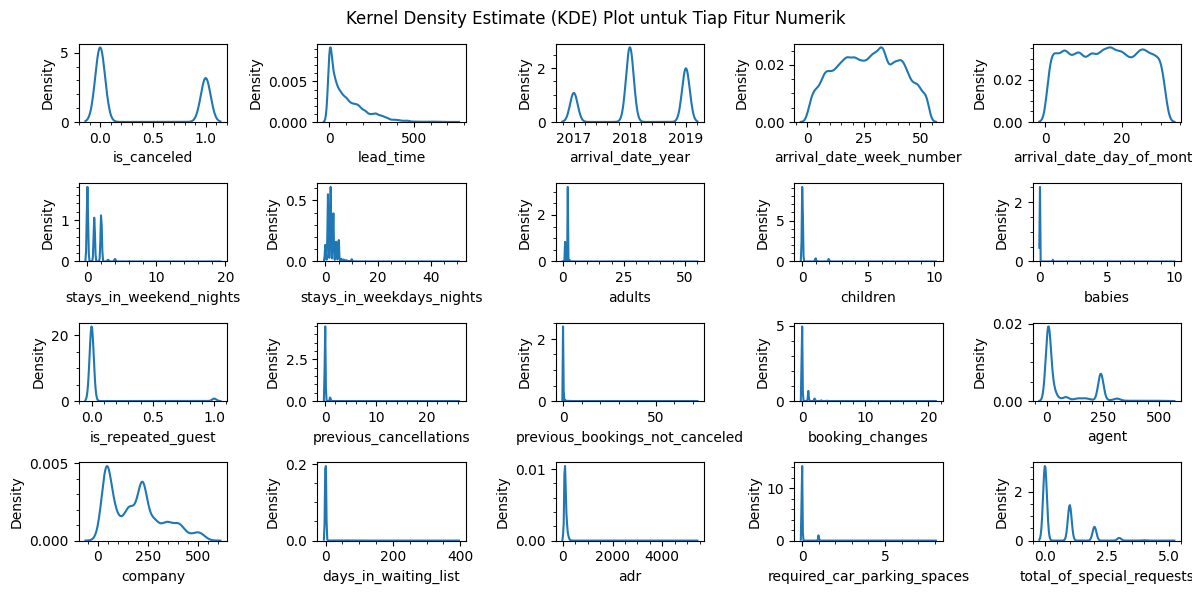

In [ ]:
# KDEplot for numeric columns (sebagai pembanding tampilan)
fig, axes = plt.subplots(4, 5, figsize=(12, 6))

plt.suptitle('Kernel Density Estimate (KDE) Plot untuk Tiap Fitur Numerik')

i = 0
for y in axes:
    for ax in y:
        column = nums[i]
        sns.kdeplot(df, x=column, ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

- **Rata-rata fitur** memiliki distribusi **positively skewed**
- **arrival_date_week_number** dan **arrival_date_day_of_month** memiliki **distribusi cenderung normal**

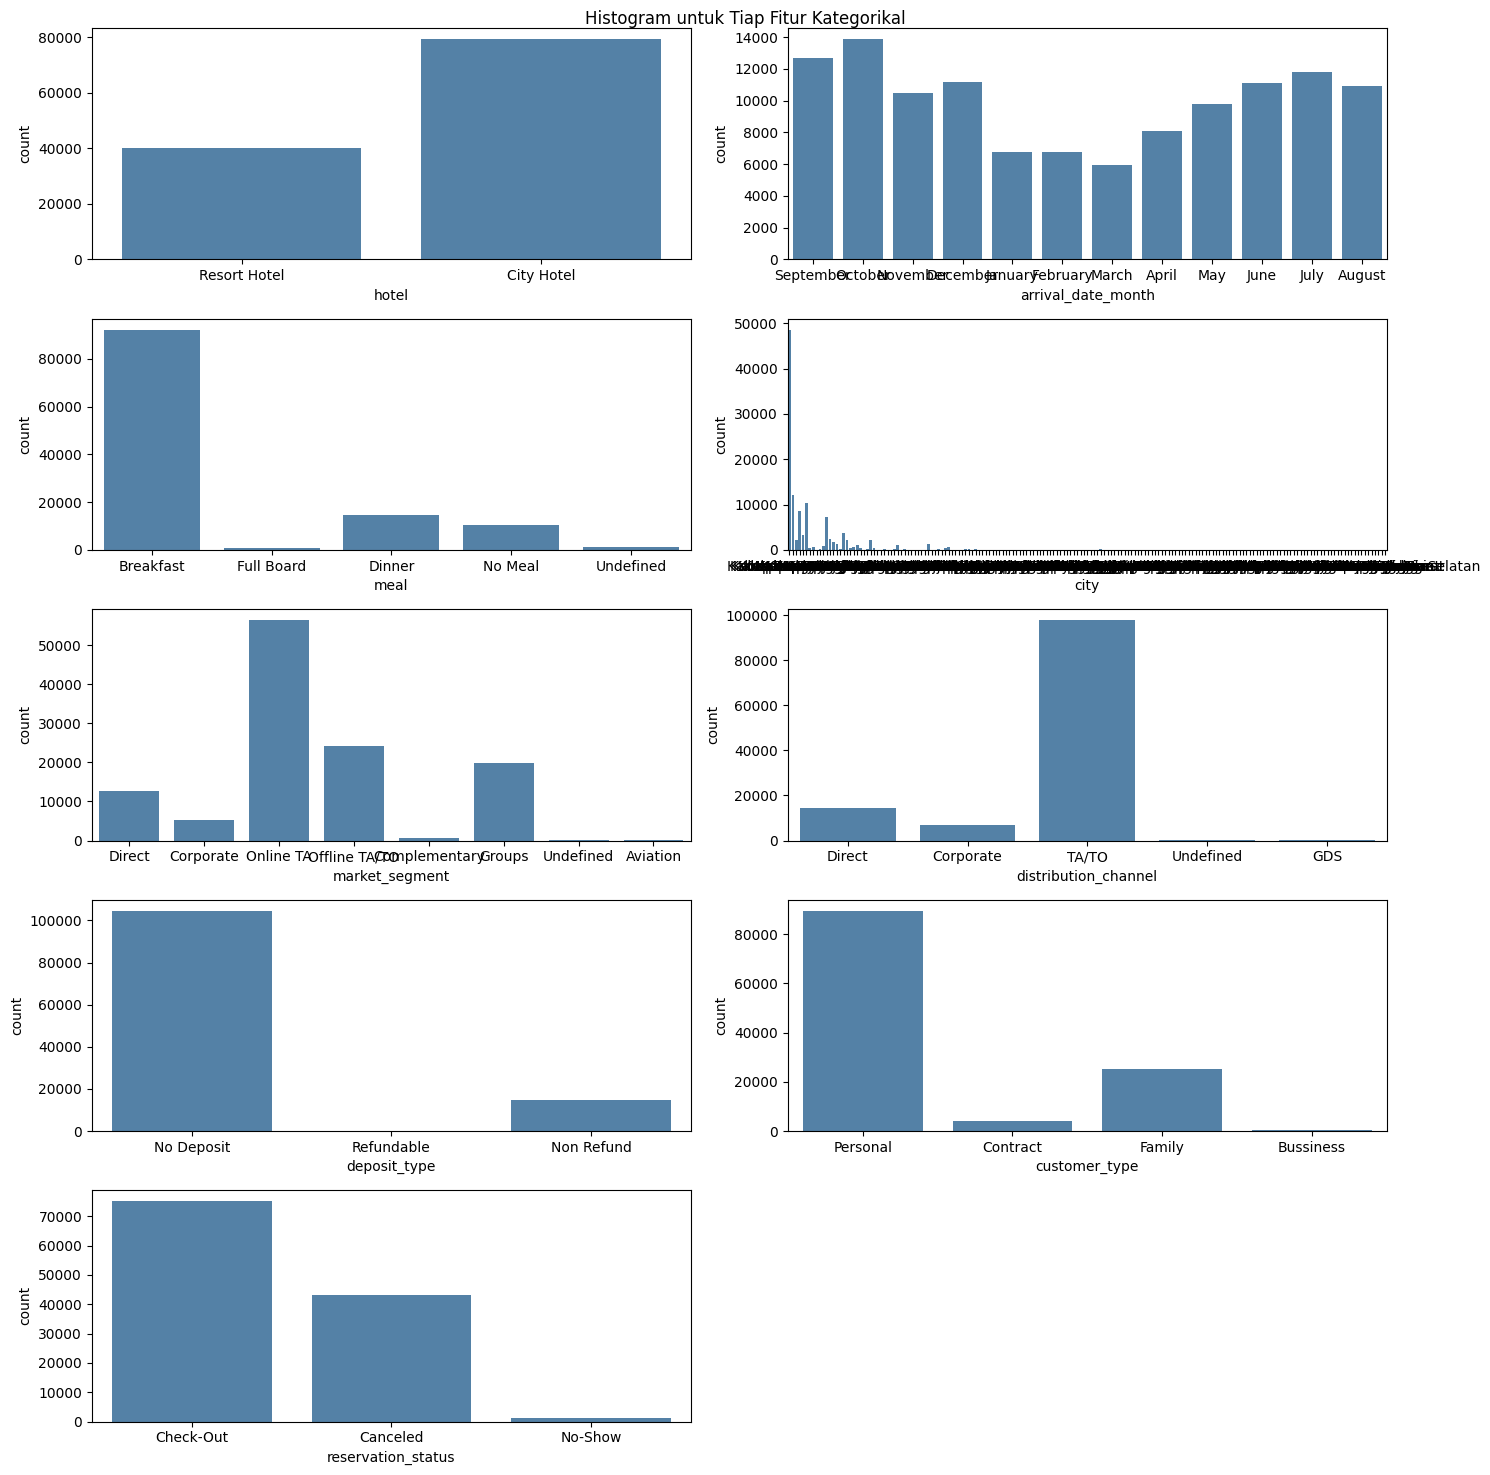

In [ ]:
# Create histplot for categorical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Histogram untuk Tiap Fitur Kategorikal')
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='steelblue')
    plt.tight_layout()

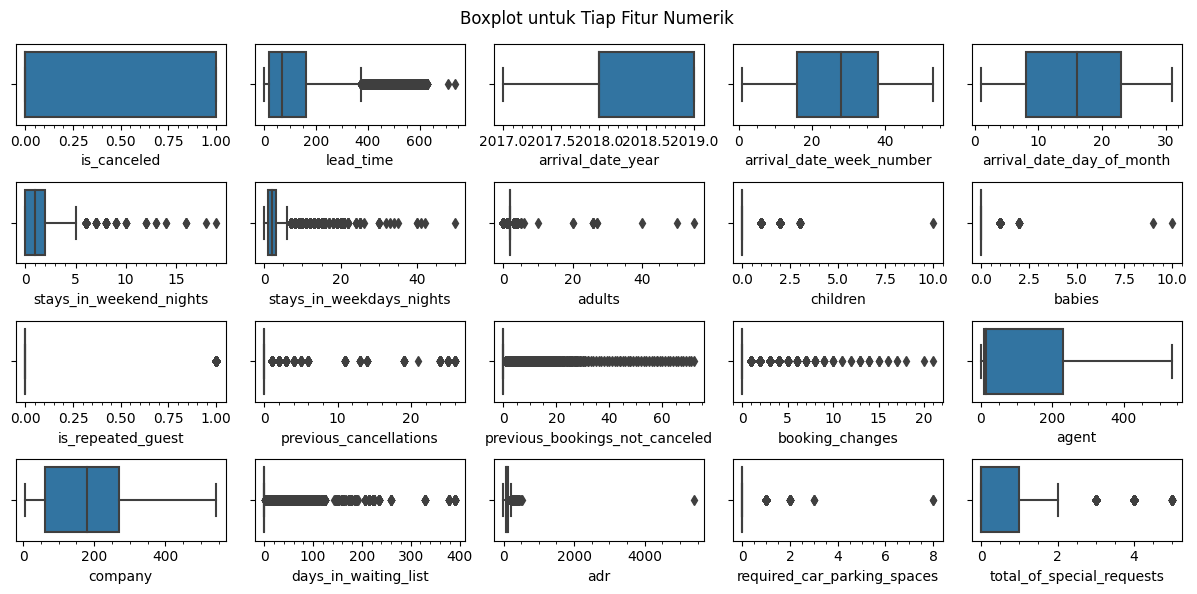

In [ ]:
# outlier check for numerical values
fig, axes = plt.subplots(4, 5, figsize=(12, 6))

plt.suptitle('Boxplot untuk Tiap Fitur Numerik')

i = 0
for y in axes:
    for ax in y:
        column = nums[i]
        sns.boxplot(df, x=column, ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

- Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier
- Hampir semua fitur memiliki outlier

# Data Pre-Processing

## Data Cleansing

In [ ]:
df_clean = df.copy()

### Handle Missing Values

Fitur yang terdapat null values yaitu **company, city, children, agent**

- fitur company dan agent akan diisi dengan 0, yang mengartikan bahwa tamu tidak berasal dari company dan melakukan reservasi secara mandiri
- fitur city dan children akan di drop karena null values < 10% data

In [ ]:
# Handling null values feature 'company' & 'agent'
ca = ['company', 'agent']
for col in ca:
  df_clean[col].fillna(0, inplace=True)

# Handling null values feature 'city' & 'children'
df_clean.dropna(subset=['city','children'], inplace=True)

In [ ]:
#Check
df_clean.isna().sum().sum()

0

### Handle Error Values

In [ ]:
for col in cats:
  print(f'Value count column: {col}')
  print(df[col].value_counts())
  print()

Value count column: hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column: arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count column: meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Value count column: city
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Value count column

- Terdapat **nilai undefined** pada fitur **meal, market_segment, dan distribution_channel.**
- **Nilai undefined** pada fitur **meal** akan **diganti menjadi 'No Meal'**, sedang **nilai undefined** pada fitur **market_segment dan distribution_chanel** akan **di drop**, karena jumlahnya yang tidak terlalu berpengaruh.

In [ ]:
# Mengganti nilai 'Undefined' dengan 'No Meal'
df_clean['meal'] = df_clean['meal'].replace('Undefined','No Meal')

# Drop nilai undefined di fitur market_segment
df_clean.drop(df_clean[df_clean['market_segment']=='Undefined'].index, inplace=True)

# Drop nilai undefined di fitur distribution_channel
df_clean.drop(df_clean[df_clean['distribution_channel']=='Undefined'].index, inplace=True)

In [ ]:
#Check data
for col in cats:
  print(f'Value count column: {col}')
  print(df_clean[col].value_counts())
  print()

Value count column: hotel
City Hotel      79302
Resort Hotel    39595
Name: hotel, dtype: int64

Value count column: arrival_date_month
October      13852
September    12627
July         11779
December     11095
June         11045
August       10927
November     10467
May           9739
April         8012
January       6752
February      6728
March         5874
Name: arrival_date_month, dtype: int64

Value count column: meal
Breakfast     91863
Dinner        14433
No Meal       11803
Full Board      798
Name: meal, dtype: int64

Value count column: city
Kota Denpasar              48585
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Value count column: market_segment
Onl

### Change Data Type

Mengganti data type children, agent, dan company dari **float** menjadi **integer**

In [ ]:
# Fix the data type
df_clean['children'] = df_clean['children'].astype('int64')
df_clean['agent'] = df_clean['agent'].astype('int64')
df_clean['company'] = df_clean['company'].astype('int64')

### Feature Engineering

In [ ]:
dfn = df_clean.copy()

In [ ]:
# Membuat kolom baru 'total_guests' yang merupakan penjumlahan dari kolom 'adults', 'children', 'babies'
dfn['total_guests'] = dfn['adults'] + dfn['children'] + dfn['babies']

# Membuat kolom baru 'stay_duration' yang merupakan penjumlahan dari kolom 'stays_in_weekend_nights' dan 'stays_in_weekdays_nights'
dfn['stay_duration'] = dfn['stays_in_weekdays_nights'] + dfn['stays_in_weekend_nights']

In [ ]:
# Check if there is data with total_guest 0 and stay_duration 0
print('Data with 0 guest: {0} out of {1} all data'.format(dfn[dfn['total_guests'] == 0].shape[0], dfn.shape[0]))
print('Data with 0 night: {0} out of {1} all data'.format(dfn[dfn['stay_duration'] == 0].shape[0], dfn.shape[0]))

Data with 0 guest: 170 out of 118897 all data
Data with 0 night: 701 out of 118897 all data


Karena **jumlah data dengan total guest dan stay duration = 0** sangat sedikit, **kurang dari 1%** total keseluruhan data, maka data dengan total guest dan stay duration = 0 akan **di drop.**

In [ ]:
# Drop data dengan 0 guest and data dengan 0 night
dfn.drop(dfn[dfn['total_guests']==0].index, inplace=True)
dfn.drop(dfn[dfn['stay_duration']==0].index, inplace=True)

### Duplicated Data and Outlier

Pada dataset ini tidak dilakuakan drop data yang duplikat dan drop outlier, karena:
- Data duplikat
dalam dataset **tidak terdapat unik_id/unik_booking_id dan tanggal**, data duplikat bisa saja memiliki informasi penting
- Outlier
data-data outlier dalam dataset ini perlu disimpan untuk diobservasi

### The Amount of Data Before and After Data Cleansing

In [ ]:
print('Total Data Before Cleaned :', df.shape[0])
print('Total Data After Cleaned :', dfn.shape[0])

Total Data Before Cleaned : 119390
Total Data After Cleaned : 118087


## Monthly Hotel Booking Analysis Based on Hotel Type

Analisis data menggunakan data yang sudah di cleaning

In [ ]:
df1 = dfn.copy()

### Ratio Total Booking per Month Based on Hotel Type

In [ ]:
monthly_booking = df1.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':['nunique','count']}).reset_index()
monthly_booking.columns = ['hotel_type', 'arrival_month', 'unique_year', 'total_booking']
monthly_booking

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7540
3,City Hotel,February,2,4097
4,City Hotel,January,2,4307
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


Data bulan **Oktober** dan **September** diambil dari data **3 tahun yang berbeda**, sedangkan **data lainnya** diambil dari data **2 tahun yang berbeda**. Maka data tersebut perlu **dinormalisasi** dengan cara menghitung rata-rata total booking yang diperoleh dari total booking dibagi dengan jumlah unique year agar perbandingan dapat dilakukan dengan baik.

### Data Normalization

In [ ]:
# Normalisasi
monthly_booking['avg_booking'] = round(monthly_booking['total_booking']/monthly_booking['unique_year'])
monthly_booking


,hotel_type,arrival_month,unique_year,total_booking,avg_booking
0,City Hotel,April,2,4917,2458.0
1,City Hotel,August,2,7874,3937.0
2,City Hotel,December,2,7540,3770.0
3,City Hotel,February,2,4097,2048.0
4,City Hotel,January,2,4307,2154.0
5,City Hotel,July,2,8184,4092.0
6,City Hotel,June,2,7458,3729.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6411,3206.0
9,City Hotel,November,2,7377,3688.0


### Sort Data by Month

In [ ]:
# Sort data by month
sort_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_booking['arrival_month'] = pd.Categorical(monthly_booking['arrival_month'], categories=sort_month, ordered=True)
monthly_booking = monthly_booking.sort_values(by=['arrival_month'])
monthly_booking

,hotel_type,arrival_month,unique_year,total_booking,avg_booking
4,City Hotel,January,2,4307,2154.0
16,Resort Hotel,January,2,2366,1183.0
3,City Hotel,February,2,4097,2048.0
15,Resort Hotel,February,2,2545,1272.0
7,City Hotel,March,2,3712,1856.0
19,Resort Hotel,March,2,2104,1052.0
0,City Hotel,April,2,4917,2458.0
12,Resort Hotel,April,2,3027,1514.0
8,City Hotel,May,2,6411,3206.0
20,Resort Hotel,May,2,3251,1626.0
